Import Liberies


In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

Get Data


In [53]:
dataSet=pd.read_csv('../AAPL.csv')
# dataSet=pd.read_csv('../AAPL.csv',index_col="Date")
dataSet

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-07,163.360001,165.020004,159.039993,159.300003,158.340836,96418800
1,2022-03-08,158.820007,162.880005,155.800003,157.440002,156.492004,131148300
2,2022-03-09,161.479996,163.410004,159.410004,162.949997,161.968842,91454900
3,2022-03-10,160.199997,160.389999,155.979996,158.520004,157.565521,105342000
4,2022-03-11,158.929993,159.279999,154.500000,154.729996,153.798325,96970100
...,...,...,...,...,...,...,...
247,2023-03-01,146.830002,147.229996,145.009995,145.309998,145.309998,55479000
248,2023-03-02,144.380005,146.710007,143.899994,145.910004,145.910004,52238100
249,2023-03-03,148.039993,151.110001,147.330002,151.029999,151.029999,70668500
250,2023-03-06,153.789993,156.300003,153.460007,153.830002,153.830002,87410100


Filtter DataFrame

In [54]:
df=dataSet['Close']
df


0      159.300003
1      157.440002
2      162.949997
3      158.520004
4      154.729996
          ...    
247    145.309998
248    145.910004
249    151.029999
250    153.830002
251    151.600006
Name: Close, Length: 252, dtype: float64

Plotting Data

<Axes: title={'center': 'AAPL DataSet'}, xlabel='Date', ylabel='Close Price'>

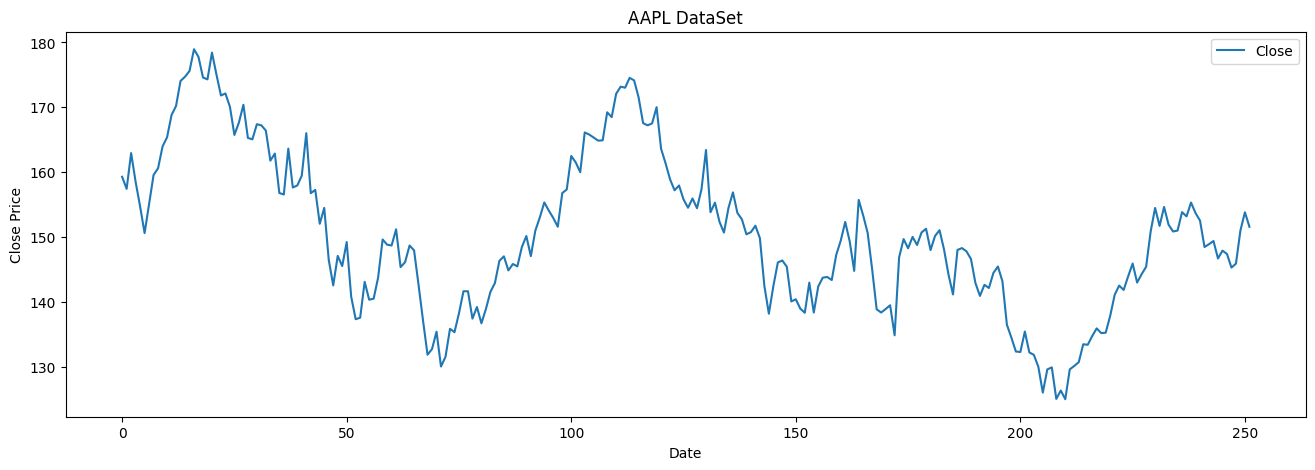

In [55]:
df.plot(figsize=(16,5),xlabel='Date',ylabel='Close Price',title="AAPL DataSet",legend="Close")

Check For Stationarity

In [6]:
# dftest=adfuller(dataSet['Close'],autolag="AIC")
# print(f"1- ADF :{dftest[0]}")
# print(f"2- P-Value :{dftest[1]}")
# print(f"3- Num Of Lags : {dftest[2]}")
# print(f"Num Of Obs Used For ADF Reg And CVC : {dftest[3]}")
# print(f"Critical Values :")
# for key,val in dftest[4].items():
#     print(f"\t ,{key} : {val}")

Split Data into Training and Testing Data

In [59]:
# number of data train
num_data_train = math.floor(len(df)*.75)
# get x_train and x_test
train=dataSet['Close'][:num_data_train]
test=dataSet['Close'][num_data_train:]

Plot Train Data and Test Data

In [47]:
# plt.figure(figsize=(16,6))
# # plt.grid(True)
# plt.xlabel("Date")
# plt.ylabel("Close Price")
# plt.plot(train,"green",label="Train Data")
# plt.plot(test,"red",label="Test Data")
# plt.legend()
# plt.show()

Order For ARIMA Model with Auto_arima

In [60]:
stepwise_fit=auto_arima(df,trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1318.384, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1319.545, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1319.400, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1316.406, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1320.761, Time=0.39 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.113 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -657.203
Date:                Mon, 13 Mar 2023   AIC                           1316.406
Time:                        23:39:22   BIC                           1319.931
Sample:                             0   HQIC                          1317.824
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        11.0099      0.863     12.755      0.000       9.318      12.702
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 3.68
Prob(Q):                              0.36   Prob(JB):                         0.16
Heteroskedasticity (H):               0.62   Skew:                             0.01
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Build And Train ARIMA Model

In [62]:
model=ARIMA(train,order=(0,1,0))
model_fit = model.fit()

Prediction

In [63]:
pred =model_fit.predict(start=len(train),end=(len(train)+len(test)-1),typ="levels")
print(pred)
prediction.plot(legend=True)
df.plot(legend=True)

189    147.809998
190    147.809998
191    147.809998
192    147.809998
193    147.809998
          ...    
247    147.809998
248    147.809998
249    147.809998
250    147.809998
251    147.809998
Name: predicted_mean, Length: 63, dtype: float64
